In [39]:
file_path1='data_set_ALL_AML_train.csv'
file_path2='data_set_ALL_AML_independent.csv'
file_path3='actual.csv'
import pandas as pd
train_df=pd.read_csv(file_path1)
test_df=pd.read_csv(file_path2)
label_df=pd.read_csv(file_path3)

In [40]:
print(train_df.shape, test_df.shape, label_df.shape)

label_df.head()


(7129, 78) (7129, 70) (72, 2)


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [41]:
train_df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [42]:
train_df=train_df.drop(columns=[col for col in train_df.columns if 'call' in col])

In [43]:
train_df.head()


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [44]:

test_df = test_df.drop(columns=[col for col in test_df.columns if 'call' in col.lower()])



In [45]:
test_df.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [46]:
# Training data
expr_cols_train = train_df.columns[2:]  # skip 'Gene Description' and 'Gene Accession Number'
X_train = train_df[expr_cols_train].T   # transpose → samples as rows
X_train.columns = train_df['Gene Accession Number']  # unique gene IDs as columns

# Test data
expr_cols_test = test_df.columns[2:]
X_test = test_df[expr_cols_test].T
X_test.columns = test_df['Gene Accession Number']

In [47]:
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [48]:
X_train.shape

(38, 7129)

In [49]:
X_test.shape

(34, 7129)

In [50]:
X_test.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [51]:

# Get sample IDs from the column names of the original train_df
sample_ids = [int(col.split('.')[0]) if '.' in col else int(col) for col in expr_cols_train]

# Assign patient IDs as index
X_train.index = sample_ids


In [52]:
y_train = label_df.set_index('patient').loc[X_train.index]['cancer'].values


In [53]:

sample_ids_test = [int(col.split('.')[0]) if '.' in col else int(col) for col in expr_cols_test]
X_test.index = sample_ids_test

# Get labels aligned with sample IDs
y_test = label_df.set_index('patient').loc[X_test.index]['cancer'].values

### label encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # ALL=0, AML=1
y_test_encoded = le.transform(y_test)


### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Feature selection

In [19]:
!pip install kneed


In [56]:
from sklearn.feature_selection import mutual_info_classif
# Compute MI scores on scaled training data
mi_scores = mutual_info_classif(X_train_scaled, y_train_encoded, random_state=42)

# Convert to pandas Series with feature names
mi_scores_series = pd.Series(mi_scores, index=X_train.columns)


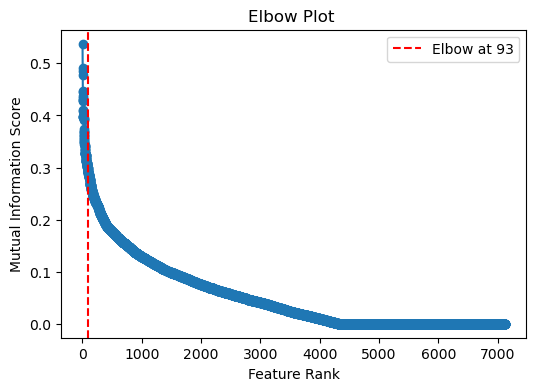

Optimal number of features: 93


In [57]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.feature_selection import mutual_info_classif
# Sort MI scores descending
mi_scores_sorted = mi_scores_series.sort_values(ascending=False).values

plt.figure(figsize=(6,4))
plt.plot(range(1, len(mi_scores_sorted)+1), mi_scores_sorted, marker='o')
plt.xlabel("Feature Rank")
plt.ylabel("Mutual Information Score")
plt.title("Elbow Plot ")

# Find elbow
knee = KneeLocator(range(1, len(mi_scores_sorted)+1), mi_scores_sorted, curve='convex', direction='decreasing')
plt.axvline(x=knee.knee, color='r', linestyle='--', label=f"Elbow at {knee.knee}")
plt.legend()
plt.show()

print("Optimal number of features:", knee.knee)


In [58]:
top_k = knee.knee  # elbow point
top_features = mi_scores_series.sort_values(ascending=False).index[:top_k]

# Subset scaled data (X_train_scaled, X_test_scaled) to top-k features
X_train_top = X_train_scaled[:, [X_train.columns.get_loc(f) for f in top_features]]
X_test_top = X_test_scaled[:, [X_test.columns.get_loc(f) for f in top_features]]

print("Shape of X_train_top:", X_train_top.shape)


Shape of X_train_top: (38, 93)


### Training

In [59]:
svc = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced', random_state=42)

# Train on top-k MI features
svc.fit(X_train_top, y_train_encoded)

SVC(C=1, class_weight='balanced', gamma=0.01, probability=True, random_state=42)

In [60]:
y_pred = svc.predict(X_test_top)
y_proba = svc.predict_proba(X_test_top)[:, 1]  # probability for ROC


In [62]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Test Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



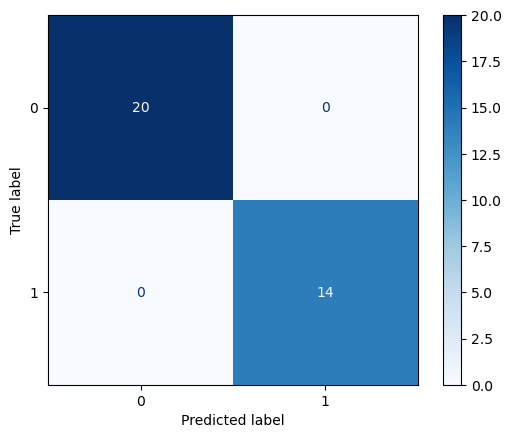

Test ROC-AUC: 1.0


In [64]:
# Accuracy & classification report
print("Test Accuracy:", svc.score(X_test_top, y_test_encoded))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()



# ROC-AUC score
print("Test ROC-AUC:", roc_auc_score(y_test_encoded, y_proba))


In [79]:
## overfitting

### reduced fetures using l1

In [65]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# L1 LinearSVC for automatic feature selection
lsvc = LinearSVC(penalty='l1', C=0.1, dual=False, class_weight='balanced', max_iter=1000, random_state=42)
lsvc.fit(X_train_top, y_train_encoded)

# Select only features with non-zero coefficients
selector = SelectFromModel(lsvc, prefit=True)
X_train_selected = selector.transform(X_train_top)
X_test_selected = selector.transform(X_test_top)

print("Number of features after L1 selection:", X_train_selected.shape[1])


Number of features after L1 selection: 11


In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train SVM on training data (selected features)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_train_selected, y_train_encoded)

# Predictions on training data
y_train_pred = svm_rbf.predict(X_train_selected)

# Evaluate training performance
train_acc = accuracy_score(y_train_encoded, y_train_pred)
train_report = classification_report(y_train_encoded, y_train_pred)
train_roc_auc = roc_auc_score(y_train_encoded, svm_rbf.predict_proba(X_train_selected)[:,1])

print("Training Accuracy:", train_acc)
print("\nClassification Report (Training):\n", train_report)
print("Training ROC-AUC:", train_roc_auc)


Training Accuracy: 1.0

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Training ROC-AUC: 1.0


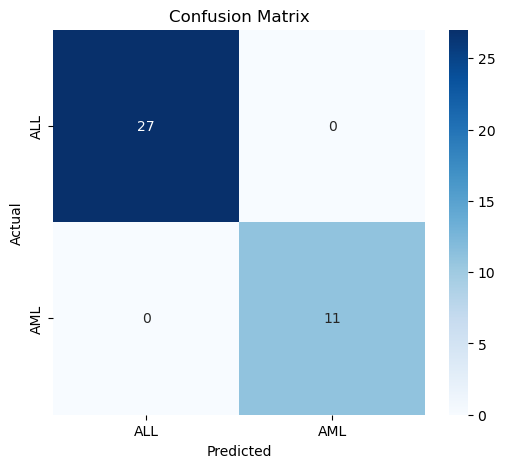

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_train_encoded, y_train_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,  # original class labels
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [68]:
# Predictions on test data
y_test_pred = svm_rbf.predict(X_test_selected)

# Evaluate test performance
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

test_acc = accuracy_score(y_test_encoded, y_test_pred)
test_report = classification_report(y_test_encoded, y_test_pred)
test_roc_auc = roc_auc_score(y_test_encoded, svm_rbf.predict_proba(X_test_selected)[:,1])

print("Test Accuracy:", test_acc)
print("\nClassification Report (Test):\n", test_report)
print("Test ROC-AUC:", test_roc_auc)


Test Accuracy: 0.9117647058823529

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.79      0.88        14

    accuracy                           0.91        34
   macro avg       0.93      0.89      0.91        34
weighted avg       0.92      0.91      0.91        34

Test ROC-AUC: 0.9714285714285713


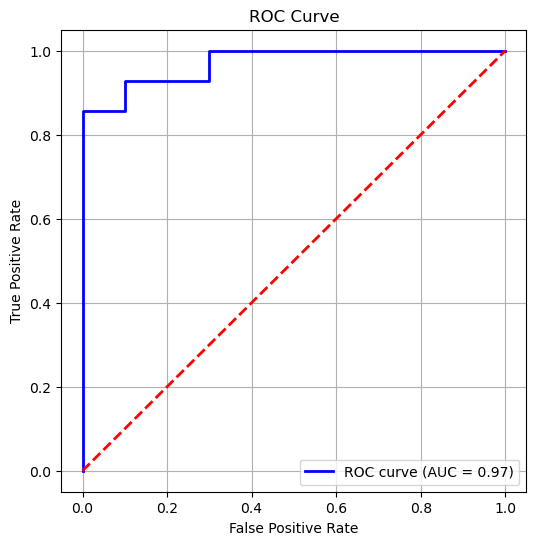

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_score = svm_rbf.predict_proba(X_test_selected)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


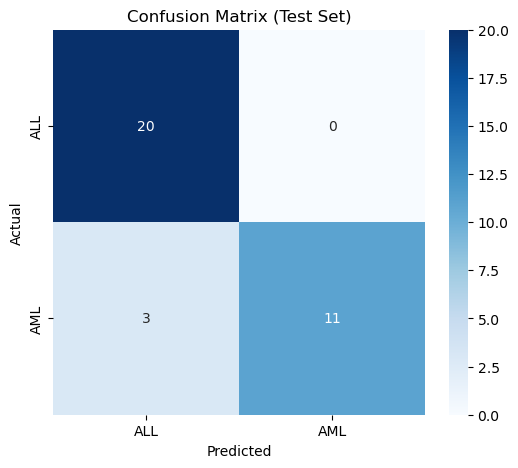

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,  # original class labels
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_selected, y_train_encoded)

# Predict on test set
y_pred_rf = rf.predict(X_test_selected)

# Evaluate
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))
print(classification_report(y_test_encoded, y_pred_rf))
print("Number of features used:", X_train_selected.shape[1])


=== Random Forest ===
Accuracy: 0.8529411764705882
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       1.00      0.64      0.78        14

    accuracy                           0.85        34
   macro avg       0.90      0.82      0.84        34
weighted avg       0.88      0.85      0.85        34

Number of features used: 11
